In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [3]:
df = pd.read_csv('upd_gb_game_reviews.csv')
df.head()

,date_added,rev_deck,rev_body,reviewer,score,characters,concepts,game_deck,game_body,developers,franchises,genres,name,platforms,publishers,similar_games,themes
0,2008-07-14 21:49:21,"['review', 'monster']","['hey', 'bet', 'give', 'tangible', 'notice', '...",snide,5.0,"['Blinky', 'Pinky', 'Pac-Man', 'Inky', 'Clyde']","['Cutscene', 'Achievements', 'Leaderboard', 'O...","['one', 'popular', 'arcade', 'game', 'time', '...","['overview', 'important', 'icon', 'arcade', 'g...","['Namco', 'WiZ']","['Pac-Man', 'ARCADE-GAME-SERIES']","['Strategy', 'Puzzle']",Pac-Man,"['Game-Boy', 'Game-Boy-Advance', 'Game-Gear', ...","['Bandai-Namco-Entertainment', 'Thunder-Mounta...","[""Lock-'n'-Chase"", 'Lady-Bug', 'Katamari-Damac...",NaN
1,2008-07-20 01:09:02,"['favorite', 'combat', 'rpg', 'time']","['rambling', 'one', 'favorite', 'game', 'nerd'...",snide,5.0,NaN,"['Experience-Points', 'Micromanagement', 'Dial...","['icewind', 'dale', 'ii', 'last', 'game', 'bui...","['summary', 'icewind', 'dale', 'ii', 'isometri...",['Black-Isle-Studios'],"['Icewind-Dale', 'Dungeons-&-Dragons', 'Forgot...",['Role-Playing'],Icewind-Dale-II,['PC'],['Interplay-Entertainment-Corp.'],"['Planescape:-Torment', ""Baldur's-Gate-II:-Sha...",['Fantasy']
2,2008-07-21 00:34:06,"['simple', 'fun']","['something', 'said', 'single', 'minded', 'pur...",joseppie,4.0,"['Death', 'Merlin-the-Wizard', 'Sumner', 'Garm...","['Teleportation', 'Cloak', 'Experience-Points'...","['gauntlet', 'legend', 'first', '3d', 'install...","['story', 'mage', 'named', 'garm', 'summoned',...",['Midway-Games'],['Gauntlet'],"['Role-Playing', 'Brawler']",Gauntlet-Legends,"['PlayStation', 'Dreamcast', 'Nintendo-64', 'A...",['Midway-Games'],"['Champions-of-Norrath', 'Ghostbusters:-Sanctu...",['Fantasy']
3,2008-07-21 00:36:10,"['best', 'around', 'still']","['last', 'best', 'mvp', 'baseball', 'serie', '...",joseppie,5.0,"['Roger-Clemens', 'Derrek-Lee', 'Jonathan-Pape...","['Cover-Athlete', 'Instant-Replay', 'Minigames...","['mvp', 'baseball', 'baseball', 'game', 'ea', ...","['new', 'feature', 'owner', 'mode', 'existing'...",['EA-Canada'],"['MVP-Baseball', 'MLB']","['Sports', 'Baseball']",MVP-Baseball-2005,"['PlayStation-Portable', 'PlayStation-2', 'Gam...",['Electronic-Arts'],"['MLB-08:-The-Show', 'Major-League-Baseball-2K...",NaN
4,2008-07-21 00:44:42,"['thrill', 'hilarity', 'ensue']","['need', 'speed', 'wanted', 'act', 'injection'...",joseppie,4.0,"['Razor-Callahan', 'Sergeant-Cross', 'Mia-Town...","['Speed-Blur', 'Cutscene', 'Achievements', 'Le...","['cruise', 'street', 'rockport', 'city', 'keep...","['overview', 'need', 'speed', 'wanted', 'relea...","['EA-Canada', 'EA-Black-Box', 'Ideaworks-Game-...",['Need-for-Speed'],"['Driving/Racing', 'Simulation']",Need-for-Speed:-Most-Wanted,"['Game-Boy-Advance', 'Mac', 'PlayStation-2', '...","['Electronic-Arts', 'Pocketeers']","['Forza-Motorsport-2', 'Test-Drive-Unlimited',...","['Crime', 'Motorsports']"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24023 entries, 0 to 24022
Data columns (total 17 columns):
date_added       24023 non-null object
rev_deck         24023 non-null object
rev_body         24023 non-null object
reviewer         24023 non-null object
score            24023 non-null float64
characters       20976 non-null object
concepts         24004 non-null object
game_deck        24023 non-null object
game_body        24023 non-null object
developers       23957 non-null object
franchises       20050 non-null object
genres           24014 non-null object
name             24023 non-null object
platforms        24023 non-null object
publishers       23894 non-null object
similar_games    24023 non-null object
themes           21976 non-null object
dtypes: float64(1), object(16)
memory usage: 3.1+ MB


In [5]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24023 entries, 0 to 24022
Data columns (total 17 columns):
date_added       24023 non-null object
rev_deck         24023 non-null object
rev_body         24023 non-null object
reviewer         24023 non-null object
score            24023 non-null float64
characters       20976 non-null object
concepts         24004 non-null object
game_deck        24023 non-null object
game_body        24023 non-null object
developers       23957 non-null object
franchises       20050 non-null object
genres           24014 non-null object
name             24023 non-null object
platforms        24023 non-null object
publishers       23894 non-null object
similar_games    24023 non-null object
themes           21976 non-null object
dtypes: float64(1), object(16)
memory usage: 3.1+ MB


In [6]:
"""
Converts string list to list

Input: string list

Returns list of feature values
"""
def stringtolist(value):
    if type(value) == float:
        return np.nan
    else:
        return ast.literal_eval(value)

In [7]:
df['game_body'] = df['game_body'].apply(lambda x: stringtolist(x))

In [8]:
df['genres'] = df['genres'].apply(lambda x: stringtolist(x))
df['developers'] = df['developers'].apply(lambda x: stringtolist(x))
df['franchises'] = df['franchises'].apply(lambda x: stringtolist(x))
df['platforms'] = df['platforms'].apply(lambda x: stringtolist(x))
df['publishers'] = df['publishers'].apply(lambda x: stringtolist(x))
df['characters'] = df['characters'].apply(lambda x: stringtolist(x))
df['concepts'] = df['concepts'].apply(lambda x: stringtolist(x))
df['similar_games'] = df['similar_games'].apply(lambda x: stringtolist(x))
df['themes'] = df['themes'].apply(lambda x: stringtolist(x))
df['rev_deck'] = df['rev_deck'].apply(lambda x: stringtolist(x))
df['game_deck'] = df['game_deck'].apply(lambda x: stringtolist(x))

In [9]:
df['rev_body'] = df['rev_body'].apply(lambda x: stringtolist(x))

In [10]:
df = df.replace(np.nan,'',regex=True) # replace NaN with empty space

In [10]:
bow_df = df[df.similar_games.notnull()] # dataframe for content-based filtering
bow_df.head()

,date_added,rev_deck,rev_body,reviewer,score,characters,concepts,game_deck,game_body,developers,franchises,genres,name,platforms,publishers,similar_games,themes
0,2008-07-14 21:49:21,"[review, monster]","[hey, bet, give, tangible, notice, completed, ...",snide,5.0,"[Blinky, Pinky, Pac-Man, Inky, Clyde]","[Cutscene, Achievements, Leaderboard, Original...","[one, popular, arcade, game, time, pac, man, r...","[overview, important, icon, arcade, gaming, or...","[Namco, WiZ]","[Pac-Man, ARCADE-GAME-SERIES]","[Strategy, Puzzle]",Pac-Man,"[Game-Boy, Game-Boy-Advance, Game-Gear, Apple-...","[Bandai-Namco-Entertainment, Thunder-Mountain,...","[Lock-'n'-Chase, Lady-Bug, Katamari-Damacy, Sp...",
1,2008-07-20 01:09:02,"[favorite, combat, rpg, time]","[rambling, one, favorite, game, nerd, alert, f...",snide,5.0,,"[Experience-Points, Micromanagement, Dialogue-...","[icewind, dale, ii, last, game, built, infinit...","[summary, icewind, dale, ii, isometric, party,...",[Black-Isle-Studios],"[Icewind-Dale, Dungeons-&-Dragons, Forgotten-R...",[Role-Playing],Icewind-Dale-II,[PC],[Interplay-Entertainment-Corp.],"[Planescape:-Torment, Baldur's-Gate-II:-Shadow...",[Fantasy]
2,2008-07-21 00:34:06,"[simple, fun]","[something, said, single, minded, purpose, gam...",joseppie,4.0,"[Death, Merlin-the-Wizard, Sumner, Garm, Skorn...","[Teleportation, Cloak, Experience-Points, Boss...","[gauntlet, legend, first, 3d, installment, fra...","[story, mage, named, garm, summoned, demon, sk...",[Midway-Games],[Gauntlet],"[Role-Playing, Brawler]",Gauntlet-Legends,"[PlayStation, Dreamcast, Nintendo-64, Arcade]",[Midway-Games],"[Champions-of-Norrath, Ghostbusters:-Sanctum-o...",[Fantasy]
3,2008-07-21 00:36:10,"[best, around, still]","[last, best, mvp, baseball, serie, mvp, repres...",joseppie,5.0,"[Roger-Clemens, Derrek-Lee, Jonathan-Papelbon,...","[Cover-Athlete, Instant-Replay, Minigames, Art...","[mvp, baseball, baseball, game, ea, sport, gam...","[new, feature, owner, mode, existing, franchis...",[EA-Canada],"[MVP-Baseball, MLB]","[Sports, Baseball]",MVP-Baseball-2005,"[PlayStation-Portable, PlayStation-2, GameCube...",[Electronic-Arts],"[MLB-08:-The-Show, Major-League-Baseball-2K8, ...",
4,2008-07-21 00:44:42,"[thrill, hilarity, ensue]","[need, speed, wanted, act, injection, freshnes...",joseppie,4.0,"[Razor-Callahan, Sergeant-Cross, Mia-Townsend,...","[Speed-Blur, Cutscene, Achievements, Leaderboa...","[cruise, street, rockport, city, keep, away, c...","[overview, need, speed, wanted, release, long,...","[EA-Canada, EA-Black-Box, Ideaworks-Game-Studio]",[Need-for-Speed],"[Driving/Racing, Simulation]",Need-for-Speed:-Most-Wanted,"[Game-Boy-Advance, Mac, PlayStation-2, Xbox-36...","[Electronic-Arts, Pocketeers]","[Forza-Motorsport-2, Test-Drive-Unlimited, Bur...","[Crime, Motorsports]"


In [11]:
bow_df = bow_df.drop_duplicates(subset='name') # only have one record for each unique game (4243 games total)
bow_df.head()

,date_added,rev_deck,rev_body,reviewer,score,characters,concepts,game_deck,game_body,developers,franchises,genres,name,platforms,publishers,similar_games,themes
0,2008-07-14 21:49:21,"[review, monster]","[hey, bet, give, tangible, notice, completed, ...",snide,5.0,"[Blinky, Pinky, Pac-Man, Inky, Clyde]","[Cutscene, Achievements, Leaderboard, Original...","[one, popular, arcade, game, time, pac, man, r...","[overview, important, icon, arcade, gaming, or...","[Namco, WiZ]","[Pac-Man, ARCADE-GAME-SERIES]","[Strategy, Puzzle]",Pac-Man,"[Game-Boy, Game-Boy-Advance, Game-Gear, Apple-...","[Bandai-Namco-Entertainment, Thunder-Mountain,...","[Lock-'n'-Chase, Lady-Bug, Katamari-Damacy, Sp...",
1,2008-07-20 01:09:02,"[favorite, combat, rpg, time]","[rambling, one, favorite, game, nerd, alert, f...",snide,5.0,,"[Experience-Points, Micromanagement, Dialogue-...","[icewind, dale, ii, last, game, built, infinit...","[summary, icewind, dale, ii, isometric, party,...",[Black-Isle-Studios],"[Icewind-Dale, Dungeons-&-Dragons, Forgotten-R...",[Role-Playing],Icewind-Dale-II,[PC],[Interplay-Entertainment-Corp.],"[Planescape:-Torment, Baldur's-Gate-II:-Shadow...",[Fantasy]
2,2008-07-21 00:34:06,"[simple, fun]","[something, said, single, minded, purpose, gam...",joseppie,4.0,"[Death, Merlin-the-Wizard, Sumner, Garm, Skorn...","[Teleportation, Cloak, Experience-Points, Boss...","[gauntlet, legend, first, 3d, installment, fra...","[story, mage, named, garm, summoned, demon, sk...",[Midway-Games],[Gauntlet],"[Role-Playing, Brawler]",Gauntlet-Legends,"[PlayStation, Dreamcast, Nintendo-64, Arcade]",[Midway-Games],"[Champions-of-Norrath, Ghostbusters:-Sanctum-o...",[Fantasy]
3,2008-07-21 00:36:10,"[best, around, still]","[last, best, mvp, baseball, serie, mvp, repres...",joseppie,5.0,"[Roger-Clemens, Derrek-Lee, Jonathan-Papelbon,...","[Cover-Athlete, Instant-Replay, Minigames, Art...","[mvp, baseball, baseball, game, ea, sport, gam...","[new, feature, owner, mode, existing, franchis...",[EA-Canada],"[MVP-Baseball, MLB]","[Sports, Baseball]",MVP-Baseball-2005,"[PlayStation-Portable, PlayStation-2, GameCube...",[Electronic-Arts],"[MLB-08:-The-Show, Major-League-Baseball-2K8, ...",
4,2008-07-21 00:44:42,"[thrill, hilarity, ensue]","[need, speed, wanted, act, injection, freshnes...",joseppie,4.0,"[Razor-Callahan, Sergeant-Cross, Mia-Townsend,...","[Speed-Blur, Cutscene, Achievements, Leaderboa...","[cruise, street, rockport, city, keep, away, c...","[overview, need, speed, wanted, release, long,...","[EA-Canada, EA-Black-Box, Ideaworks-Game-Studio]",[Need-for-Speed],"[Driving/Racing, Simulation]",Need-for-Speed:-Most-Wanted,"[Game-Boy-Advance, Mac, PlayStation-2, Xbox-36...","[Electronic-Arts, Pocketeers]","[Forza-Motorsport-2, Test-Drive-Unlimited, Bur...","[Crime, Motorsports]"


In [12]:
bow_df['bag_of_words'] = (bow_df['genres'].apply(lambda x: ' '.join(x)))

In [13]:
bow_df['bag_of_words'] = bow_df['bag_of_words'].str.lower()
bow_df.head()

,date_added,rev_deck,rev_body,reviewer,score,characters,concepts,game_deck,game_body,developers,franchises,genres,name,platforms,publishers,similar_games,themes,bag_of_words
0,2008-07-14 21:49:21,"[review, monster]","[hey, bet, give, tangible, notice, completed, ...",snide,5.0,"[Blinky, Pinky, Pac-Man, Inky, Clyde]","[Cutscene, Achievements, Leaderboard, Original...","[one, popular, arcade, game, time, pac, man, r...","[overview, important, icon, arcade, gaming, or...","[Namco, WiZ]","[Pac-Man, ARCADE-GAME-SERIES]","[Strategy, Puzzle]",Pac-Man,"[Game-Boy, Game-Boy-Advance, Game-Gear, Apple-...","[Bandai-Namco-Entertainment, Thunder-Mountain,...","[Lock-'n'-Chase, Lady-Bug, Katamari-Damacy, Sp...",,strategy puzzle
1,2008-07-20 01:09:02,"[favorite, combat, rpg, time]","[rambling, one, favorite, game, nerd, alert, f...",snide,5.0,,"[Experience-Points, Micromanagement, Dialogue-...","[icewind, dale, ii, last, game, built, infinit...","[summary, icewind, dale, ii, isometric, party,...",[Black-Isle-Studios],"[Icewind-Dale, Dungeons-&-Dragons, Forgotten-R...",[Role-Playing],Icewind-Dale-II,[PC],[Interplay-Entertainment-Corp.],"[Planescape:-Torment, Baldur's-Gate-II:-Shadow...",[Fantasy],role-playing
2,2008-07-21 00:34:06,"[simple, fun]","[something, said, single, minded, purpose, gam...",joseppie,4.0,"[Death, Merlin-the-Wizard, Sumner, Garm, Skorn...","[Teleportation, Cloak, Experience-Points, Boss...","[gauntlet, legend, first, 3d, installment, fra...","[story, mage, named, garm, summoned, demon, sk...",[Midway-Games],[Gauntlet],"[Role-Playing, Brawler]",Gauntlet-Legends,"[PlayStation, Dreamcast, Nintendo-64, Arcade]",[Midway-Games],"[Champions-of-Norrath, Ghostbusters:-Sanctum-o...",[Fantasy],role-playing brawler
3,2008-07-21 00:36:10,"[best, around, still]","[last, best, mvp, baseball, serie, mvp, repres...",joseppie,5.0,"[Roger-Clemens, Derrek-Lee, Jonathan-Papelbon,...","[Cover-Athlete, Instant-Replay, Minigames, Art...","[mvp, baseball, baseball, game, ea, sport, gam...","[new, feature, owner, mode, existing, franchis...",[EA-Canada],"[MVP-Baseball, MLB]","[Sports, Baseball]",MVP-Baseball-2005,"[PlayStation-Portable, PlayStation-2, GameCube...",[Electronic-Arts],"[MLB-08:-The-Show, Major-League-Baseball-2K8, ...",,sports baseball
4,2008-07-21 00:44:42,"[thrill, hilarity, ensue]","[need, speed, wanted, act, injection, freshnes...",joseppie,4.0,"[Razor-Callahan, Sergeant-Cross, Mia-Townsend,...","[Speed-Blur, Cutscene, Achievements, Leaderboa...","[cruise, street, rockport, city, keep, away, c...","[overview, need, speed, wanted, release, long,...","[EA-Canada, EA-Black-Box, Ideaworks-Game-Studio]",[Need-for-Speed],"[Driving/Racing, Simulation]",Need-for-Speed:-Most-Wanted,"[Game-Boy-Advance, Mac, PlayStation-2, Xbox-36...","[Electronic-Arts, Pocketeers]","[Forza-Motorsport-2, Test-Drive-Unlimited, Bur...","[Crime, Motorsports]",driving/racing simulation


# Content-Based

In [16]:
"""
Content Based Filtering system that recommends games based on their similarity to other games, using only the game's features

Input: dataframe bow_df

Returns metrics for recommendation list
"""
def content_based(bow_df):
    ds = bow_df[['name','bag_of_words']].reset_index(drop=True)
    tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
    tfidf_matrix = tf.fit_transform(ds['bag_of_words'])
    cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix) # determine cosine similarity between each game
    results = {}
    for idx, row in ds.iterrows():
        similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
        similar_items = [(cosine_similarities[idx][i], ds['name'].iloc[i]) for i in similar_indices] 
        results[row['name']] = similar_items[1:]

    # Just reads the results out of the dictionary.def 
    def recommend(item_name, num):
        game_list = []
        #print("Recommending " + str(num) + " games similar to " + item_name + "...")   
        #print("-------")
        try:
            recs = results[item_name][:num] 
            for rec in recs: 
                #print("Recommended: " + str(rec[1]) + " (score:" + str(rec[0]) + ")")
                game_list.append(str(rec[1]))
            return(game_list)
        except KeyError:
            print("Game not found in unique game list!")
            return None
    
    def evaluate_content(n):
        prec = 0
        rec = 0
        f1 = 0
        for name in df.name.unique():
            i_prec = 0
            i_rec = 0
            count = 0
            rec_list = recommend(name, n)
            sim_list = df[df.name == name].similar_games[df[df.name==name].index[0]]
            for game in rec_list:
                if game in sim_list:
                    count += 1
        
            prec += (count/n)
            rec += (count/len(sim_list))
            
            i_prec += (count/n)
            i_rec += (count/len(sim_list))
            
            if (i_prec+i_rec) == 0:
                f1 += 0
            else:
                f1 += (2*((i_prec*i_rec)/(i_prec+i_rec)))

        
        print("Avg Precision: " + str(prec/len(df.name.unique())) + ', when recommending ' + str(n) + ' games.')
        print("Avg Recall:", str(rec/len(df.name.unique())) + ', when recommending ' + str(n) + ' games.')
        print("Avg F1:", str(f1/len(df.name.unique())) + ', when recommending ' + str(n) + ' games.')


    evaluate_content(10)

    

In [156]:
# Just reads the results out of the dictionary.def 
ds = bow_df[['name','bag_of_words']].reset_index(drop=True)
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(ds['bag_of_words'])
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
results = {}
for idx, row in ds.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_items = [(cosine_similarities[idx][i], ds['name'].iloc[i]) for i in similar_indices] 
    results[row['name']] = similar_items[1:]

def recommend(item_name, num):
    game_list = []
    #print("Recommending " + str(num) + " games similar to " + item_name + "...")   
    #print("-------")
    try:
        recs = results[item_name][:num] 
        for rec in recs: 
            #print("Recommended: " + str(rec[1]) + " (score:" + str(rec[0]) + ")")
            game_list.append(str(rec[1]))
        return(game_list)
    except KeyError:
        print("Game not found in unique game list!")
        return None

def evaluate_content(n):
    prec = 0
    rec = 0
    f1 = 0
    for name in df.name.unique():
        i_prec = 0
        i_rec = 0
        count = 0
        rec_list = recommend(name, n)
        sim_list = df[df.name == name].similar_games[df[df.name==name].index[0]]
        for game in rec_list:
            if game in sim_list:
                count += 1

        prec += (count/n)
        rec += (count/len(sim_list))

        i_prec += (count/n)
        i_rec += (count/len(sim_list))

        if (i_prec+i_rec) == 0:
            f1 += 0
        else:
            f1 += (2*((i_prec*i_rec)/(i_prec+i_rec)))


    print("Avg Precision: " + str(prec/len(df.name.unique())) + ', when recommending ' + str(n) + ' games.')
    print("Avg Recall:", str(rec/len(df.name.unique())) + ', when recommending ' + str(n) + ' games.')
    print("Avg F1:", str(f1/len(df.name.unique())) + ', when recommending ' + str(n) + ' games.')

In [47]:
# try each combination of games features

In [21]:
bow_df['bag_of_words'] = (bow_df['genres'].apply(lambda x: ' '.join(x)) + ' ' + 
 bow_df['game_body'].apply(lambda x: ' '.join(x)) + ' ' + 
 bow_df['characters'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['franchises'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['themes'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['concepts'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['developers'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['platforms'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['publishers'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['game_deck'].apply(lambda x: ' '.join(x)))

bow_df['bag_of_words'] = bow_df['bag_of_words'].str.lower()
content_based(bow_df)

Avg Precision: 0.0870944825953126, when recommending 10 games.
Avg Recall: 0.19118192358840158, when recommending 10 games.
Avg F1: 0.10275292235701952, when recommending 10 games.



In [22]:
bow_df['bag_of_words'] = (bow_df['genres'].apply(lambda x: ' '.join(x)) + ' ' + 
 bow_df['game_body'].apply(lambda x: ' '.join(x)) + ' ' + 
 bow_df['franchises'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['themes'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['concepts'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['developers'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['platforms'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['publishers'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['game_deck'].apply(lambda x: ' '.join(x)))

bow_df['bag_of_words'] = bow_df['bag_of_words'].str.lower()
content_based(bow_df)

Avg Precision: 0.08816007577551628, when recommending 10 games.
Avg Recall: 0.19298134436002906, when recommending 10 games.
Avg F1: 0.10396511138213906, when recommending 10 games.



In [31]:
bow_df['bag_of_words'] = (bow_df['genres'].apply(lambda x: ' '.join(x)) + ' ' + 
 bow_df['themes'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['concepts'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['developers'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['platforms'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['publishers'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['game_deck'].apply(lambda x: ' '.join(x)) + ' ' + 
 bow_df['franchises'].apply(lambda x: ' '.join(x)))

bow_df['bag_of_words'] = bow_df['bag_of_words'].str.lower()
content_based(bow_df)

Avg Precision: 0.1086431446838764, when recommending 10 games.
Avg Recall: 0.2059019549833452, when recommending 10 games.
Avg F1: 0.121811081683437, when recommending 10 games.



In [33]:
bow_df['bag_of_words'] = (bow_df['genres'].apply(lambda x: ' '.join(x)) + ' ' + 
 bow_df['themes'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['concepts'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['developers'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['platforms'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['game_deck'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['publishers'].apply(lambda x: ' '.join(x)))

bow_df['bag_of_words'] = bow_df['bag_of_words'].str.lower()
content_based(bow_df)

Avg Precision: 0.11008761543926353, when recommending 10 games.
Avg Recall: 0.2089172473833418, when recommending 10 games.
Avg F1: 0.12332665982992629, when recommending 10 games.



In [154]:
bow_df['bag_of_words'] = (bow_df['genres'].apply(lambda x: ' '.join(x)) + ' ' + 
 bow_df['themes'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['concepts'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['developers'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['platforms'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['game_deck'].apply(lambda x: ' '.join(x)))

bow_df['bag_of_words'] = bow_df['bag_of_words'].str.lower()
content_based(bow_df)

Avg Precision: 0.11134264740705896, when recommending 10 games.
Avg Recall: 0.2105505791725541, when recommending 10 games.
Avg F1: 0.12474039662492718, when recommending 10 games.



In [155]:
bow_df['bag_of_words'] = (bow_df['genres'].apply(lambda x: ' '.join(x)) + ' ' + 
 bow_df['themes'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['concepts'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['developers'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['platforms'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['game_deck'].apply(lambda x: ' '.join(x))  + ' ' + 
 bow_df['characters'].apply(lambda x: ' '.join(x)))

bow_df['bag_of_words'] = bow_df['bag_of_words'].str.lower()
content_based(bow_df)

Avg Precision: 0.10618044044518338, when recommending 10 games.
Avg Recall: 0.20023792710943394, when recommending 10 games.
Avg F1: 0.11895909878409917, when recommending 10 games.



In [49]:
df[df.name == 'Pac-Man'].similar_games[df[df.name=='Pac-Man'].index[0]] # example Pac-Man

["Lock-'n'-Chase",
 'Lady-Bug',
 'Katamari-Damacy',
 'Spore',
 'Mario-Bros.',
 'Dig-Dug',
 'Bit-Boy!!',
 'Bit.Trip-Void',
 'The-Legend-of-Zelda:-Spirit-Tracks',
 'Jungler',
 'Gubble',
 "Monaco:-What's-Yours-Is-Mine",
 'Grand-Theft-Auto',
 'Wolfenstein-3D',
 'Metal-Gear',
 'Galaxian',
 'Space-Invaders']

In [157]:
recommend('Pac-Man', 10)

['Dig-Dug',
 'Ms.-Pac-Man',
 'Galaxian',
 'Galaga',
 'Centipede',
 'Mario-Bros.',
 'Frogger',
 'Pac-Man-Championship-Edition',
 'Tetris',
 'Space-Invaders']

# Collaborative-Based

In [11]:
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

In [12]:
# create user item rating dataframe
temp = df[['reviewer', 'name','score']]
temp['score'] = temp['score'].apply(lambda x: x + 1.0) # add 1 to each rating
temp.head()

C:\Users\dgoka\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,reviewer,name,score
0,snide,Pac-Man,6.0
1,snide,Icewind-Dale-II,6.0
2,joseppie,Gauntlet-Legends,5.0
3,joseppie,MVP-Baseball-2005,6.0
4,joseppie,Need-for-Speed:-Most-Wanted,5.0


(array([ 157.,    0.,  571.,    0., 1598.,    0., 4025.,    0., 8984.,
        8688.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

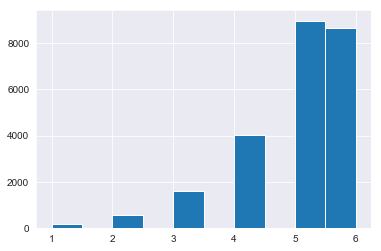

In [13]:
plt.hist(temp.score) 

In [14]:
# contains user that reviewed at least two games, and games that have been reviewed at least twice
min_game_ratings = 2
filter_games = temp['name'].value_counts() > min_game_ratings
filter_games = filter_games[filter_games].index.tolist()

min_user_ratings = 2
filter_users = temp['reviewer'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_new = temp[(temp['name'].isin(filter_games)) & (temp['reviewer'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(temp.shape))
print('The new data frame shape:\t{}'.format(df_new.shape))

The original data frame shape:	(24023, 3)
The new data frame shape:	(15809, 3)


In [15]:
# use surprise to create user-item rating matrix
reader = Reader(rating_scale=(1.0, 6.0))
data = Dataset.load_from_df(df_new[['reviewer', 'name', 'score']], reader)

In [16]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
evals = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse') 
evals

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
SVDpp,0.875231,0.662257,6.557233,0.221407
SVD,0.885303,0.669797,1.103522,0.058510
BaselineOnly,0.891046,0.674665,0.047872,0.040890
KNNBaseline,0.927819,0.686364,1.927716,0.345411
CoClustering,0.979352,0.715567,0.589479,0.045876
KNNBasic,0.998218,0.714185,2.506148,0.293325
KNNWithMeans,1.004029,0.733864,0.326460,0.368016
KNNWithZScore,1.011549,0.737503,0.192996,0.253656
SlopeOne,1.052888,0.776660,0.258973,0.123338


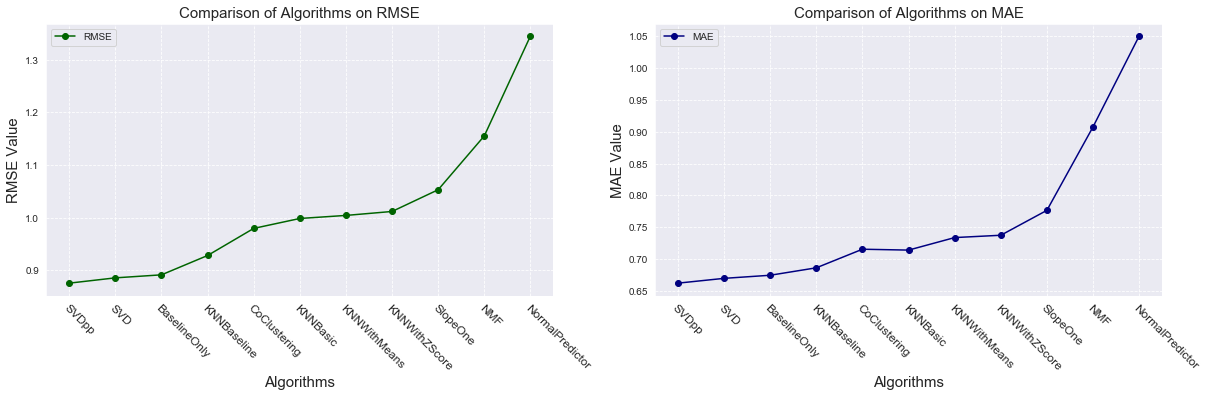

In [17]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.title('Comparison of Algorithms on RMSE', loc='center', fontsize=15)
plt.plot(evals.index, evals.test_rmse, label='RMSE', color='darkgreen', marker='o')
plt.xticks(fontsize=12, rotation = -45, ha='left', rotation_mode="anchor")
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.subplot(1, 2, 2)
plt.title('Comparison of Algorithms on MAE', loc='center', fontsize=15)
plt.plot(evals.index, evals.test_mae, label='MAE', color='navy', marker='o')
plt.xticks(fontsize=12, rotation = -45, ha='left', rotation_mode="anchor")
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.show()

In [18]:
# determine best parameters for SVD++ and SVD

svd_param_grid = {'n_epochs': [20, 25], 
                  'lr_all': [0.007, 0.009, 0.01],
                  'reg_all': [0.4, 0.6]}

gs = GridSearchCV(SVDpp, svd_param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(data)

svd_gs = GridSearchCV(SVD, svd_param_grid, measures=['rmse', 'mae'], cv=3)
svd_gs.fit(data)

In [19]:
print("SVD++ - RMSE:", gs.best_score["rmse"])
print("SVD++ - MAE:", gs.best_score["mae"])

print()

print('SVD++ - RMSE =', gs.best_params['rmse'])
print('SVD++ - MAE =', gs.best_params['mae'])

print()

print("SVD - RMSE:", svd_gs.best_score["rmse"])
print("SVD - MAE:", svd_gs.best_score["mae"])

print()

print('SVD - RMSE =', svd_gs.best_params['rmse'])
print('SVD - MAE =', svd_gs.best_params['mae'])

SVD++ - RMSE: 0.8730145806952025
SVD++ - MAE: 0.6674879517998974

SVD++ - RMSE = {'n_epochs': 25, 'lr_all': 0.01, 'reg_all': 0.4}
SVD++ - MAE = {'n_epochs': 25, 'lr_all': 0.01, 'reg_all': 0.4}

SVD - RMSE: 0.873879847529463
SVD - MAE: 0.6678460705126544

SVD - RMSE = {'n_epochs': 25, 'lr_all': 0.01, 'reg_all': 0.4}
SVD - MAE = {'n_epochs': 25, 'lr_all': 0.009, 'reg_all': 0.4}


In [18]:
trainset, testset = train_test_split(data, test_size=0.25)

In [21]:
algo = SVDpp(n_epochs = 25,lr_all = 0.01,reg_all = 0.4)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 0.8880
MAE:  0.6760


0.6759633792214061

In [20]:
algo = SVD(n_epochs = 25,lr_all = 0.01,reg_all = 0.4)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 0.8896
MAE:  0.6774


0.6773705727683119

In [23]:
algo.predict('jedo', 'Halo-2', 4) # remember, its score + 1

Prediction(uid='jedo', iid='Halo-2', r_ui=4, est=4.499694020298937, details={'was_impossible': False})

In [24]:
df[df.reviewer=='jedo']

,date_added,rev_deck,rev_body,reviewer,score,characters,concepts,game_deck,game_body,developers,franchises,genres,name,platforms,publishers,similar_games,themes
22617,2016-03-05 12:08:07,"[disappointing, boring, ok, playing, other]","[elder, scroll, online, like, like, alien, sto...",jedo,3.0,"[Molag-Bal, Orthe, Kathutet, Clavicus-Vile, An...","[Stealth, Magic, Cooperative-Play, Health, Ali...","[mmorpg, set, world, nirn, focusing, familiar,...","[overview, first, online, game, elder, scroll,...","[ZeniMax-Online-Studios, Iron-Galaxy-Studios]",[The-Elder-Scrolls],[MMORPG],The-Elder-Scrolls-Online,"[Mac, PC, Xbox-One, PlayStation-4]",[Bethesda-Softworks],"[EverQuest, Two-Worlds-II, World-of-Warcraft, ...",[Fantasy]
22714,2016-05-03 01:22:36,"[pc, version, feature, bioware, quality, chara...","[con, terribly, ported, control, pc, good, beg...",jedo,3.0,"[Morrigan, Alistair, Flemeth, Leliana, Queen-A...","[Wilhelm-Scream, Customizable-Characters, Orig...","[dragon, age, inquisition, third, installment,...","[overview, dragon, age, inquisition, third, pr...",[BioWare],[Dragon-Age],"[Action, Role-Playing]",Dragon-Age:-Inquisition,"[Xbox-360, PlayStation-3, PlayStation-Network-...",[Electronic-Arts],"[Two-Worlds-II, Game-of-Thrones, The-Witcher-2...","[Fantasy, Medieval]"
22772,2016-05-27 01:10:51,"[incredibly, high, quality, mixed, incredibly,...","[gta, v, run, risk, one, overrated, game, best...",jedo,3.0,"[Lazlow-Jones, Claude-Speed, Brucie-Kibbutz, P...","[Easter-Egg, Cutscene, Stealth, Multiple-Endin...","[rockstar, return, fictional, state, san, andr...","[overview, grand, theft, auto, v, gta, v, take...",[Rockstar-North],[Grand-Theft-Auto],"[Driving/Racing, Action-Adventure]",Grand-Theft-Auto-V,"[Xbox-360, PlayStation-3, Xbox-360-Games-Store...","[Rockstar-Games, Take-Two-Interactive-Software...","[Red-Dead-Redemption, Watch-Dogs, Yakuza-4, Sa...",[Crime]
22773,2016-05-27 01:59:33,"[real, flaw, simple, pretty, co, op, platformer]","[5d, pretty, meant, played, buddie, physic, pu...",jedo,5.0,"[Amadeus, Pontius, Zoya]","[Magic, Cooperative-Play, Multiple-Protagonist...","[sequel, frozenbyte, action, platformer, trine]","[overview, sequel, physic, based, co, operativ...","[Frozenbyte,-Inc., Outsource-Media-(OMUK)]",[Trine],"[Puzzle, Platformer]",Trine-2,"[Mac, Xbox-360-Games-Store, PlayStation-Networ...","[Atlus-U.S.A.,-Inc., Frozenbyte,-Inc., Nintendo]","[The-Cave, Oddworld:-Abe's-Oddysee]",[Fantasy]
22774,2016-05-27 05:03:48,"[impressive, disappointing, time]","[x, file, game, came, disk, alone, amazing, ye...",jedo,3.0,"[Fox-Mulder, Dana-Scully, Walter-Skinner, The-...","[Quick-Time-Event, Point-and-Click, Dialogue-T...","[x, file, game, point, click, fmv, adventure, ...","[overview, x, file, game, player, assume, role...",[Hyperbole-Studios],[The-X-Files],[Adventure],The-X-Files-Game,"[Mac, PlayStation, PC]",[Fox-Interactive],[Roberta-Williams'-Phantasmagoria],"[Horror, Sci-Fi]"
22775,2016-05-27 05:54:34,"[classic, rt, cool, idea]","[earth, serie, part, classic, rt, genre, meani...",jedo,3.0,,"[Customization, Invisibility, Superweapon, Mod...","[collapse, humanity, earth, three, global, fac...",[],[REALITY-PUMP-Sp.-z-o.o.],[Earth],"[Action, Real-Time-Strategy]",Earth-2160,[PC],"[ZUXXEZ-Entertainment-AG, Midway-Games, TopWar...","[Homeworld, Tryst, Grey-Goo]","[Sci-Fi, Post-Apocalyptic]"
22821,2016-06-29 07:47:06,"[one, greatest, multiplayer, fp]","[difficult, strike, true, balance, game, build...",jedo,5.0,,"[Sniping, Push-to-Talk, Cooperative-Play, Frag...","[insurgency, originally, insurgency, multiplay...","[overview, insurgency, follow, original, insur...",[New-World-Interactive],[Insurgency],"[Action, Strategy, Shooter, First-Person-Shooter]",Insurgency,"[Mac, PC, Linux]",[New-World-Interactive],"[Red-Orchestra:-Ostfront-41-45, Operation-Flas...",[Modern-Military]
22825,2016-06-30 00:56:31,"[one, worst, shooter]","[shock, experienced, much, poor, quality, game...",jedo,2.0,"[Alma-Wade, F.E.A.R.-Point-Man, Paxton-Fettel

In [22]:
def get_Iu(reviewer):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(reviewer)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(name):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(name)])
    except ValueError:
        return 0
    
res = pd.DataFrame(predictions, columns=['reviewer', 'name', 'actual', 'predicted', 'details'])
res['# of user ratings'] = res.reviewer.apply(get_Iu)
res['# of item ratings'] = res.name.apply(get_Ui)
res['err'] = abs(res.predicted - res.actual)
best_predictions = res.sort_values(by='err')[:10]
worst_predictions = res.sort_values(by='err')[-10:]

In [23]:
best_predictions

,reviewer,name,actual,predicted,details,# of user ratings,# of item ratings,err
1294,shadowratchet92,Halo-3:-ODST,5.0,4.999120,{'was_impossible': False},13,44,0.000880
1202,jecrell,Uncharted:-Drake's-Fortune,5.0,4.999018,{'was_impossible': False},6,57,0.000982
2793,benderunit22,Tom-Clancy's-Rainbow-Six:-Vegas,5.0,4.999009,{'was_impossible': False},4,9,0.000991
1844,ravenhoe,Baldur's-Gate:-Dark-Alliance,5.0,4.998323,{'was_impossible': False},19,0,0.001677
2057,nukesniper,Mirror's-Edge,5.0,5.002008,{'was_impossible': False},6,51,0.002008
281,redbullet685,Catherine,5.0,4.997607,{'was_impossible': False},6,19,0.002393
1399,mrfizzy,Evil-Genius,5.0,5.002626,{'was_impossible': False},2,0,0.002626
1360,darkcypher,Vampire:-The-Masquerade---Bloodlines,5.0,5.002648,{'was_impossible': False},2,4,0.002648
2231,andyboy,Hector:-Badge-of-Carnage,5.0,4.997170,{'was_impossible': False},3,2,0.002830
2073,saddlebrown,The-Last-of-Us,5.0,4.996803,{'was_impossible': False},4,31,0.003197


In [24]:
worst_predictions

,reviewer,name,actual,predicted,details,# of user ratings,# of item ratings,err
1406,bananahammock,Penny-Arcade-Adventures:-On-the-Rain-Slick-Pre...,1.0,4.789355,{'was_impossible': False},2,8,3.789355
821,derelict,Jak-3,1.0,4.819385,{'was_impossible': False},7,1,3.819385
345,josephbarron,Wheelman,1.0,4.868164,{'was_impossible': False},8,1,3.868164
3514,code305,Devil-May-Cry-3:-Dante's-Awakening,1.0,4.900427,{'was_impossible': False},1,4,3.900427
349,outofbounds9000,Grand-Theft-Auto:-Chinatown-Wars,1.0,4.971511,{'was_impossible': False},9,14,3.971511
838,susurruskarma,Fable,1.0,5.131999,{'was_impossible': False},22,8,4.131999
2700,kodmani,LittleBigPlanet,1.0,5.203829,{'was_impossible': False},7,23,4.203829
1231,09spade09,Resident-Evil-4,1.0,5.330730,{'was_impossible': False},2,35,4.330730
848,philosoma,Metroid:-Zero-Mission,1.0,5.706847,{'was_impossible': False},16,6,4.706847
1469,old_snake864,Grand-Theft-Auto-IV,1.0,5.846463,{'was_impossible': False},11,92,4.846463


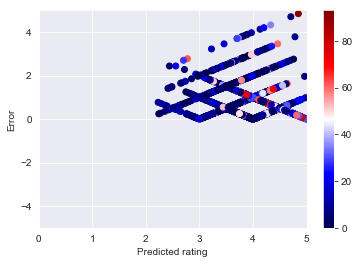

In [66]:
import seaborn as sns
sns.set_style("darkgrid")
cm = plt.cm.get_cmap('seismic')


plt.scatter(res.predicted, res.err, c=res["# of item ratings"], cmap=cm)

plt.xlabel("Predicted rating")
plt.ylabel("Error")
plt.ylim(-5,5)
plt.xlim(1,6)
plt.xticks((1,2,3,4,5,6), labels=["0","1","2","3","4","5"])

plt.colorbar()

In [ ]:
plt.hist(df[df.name=='Mass-Effect'].score)

In [33]:
np.mean(res.predicted)

4.997659129802127